<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B3%A03(2022%ED%95%99%EB%85%84%EB%8F%84)%EC%88%98%EB%8A%A5%EA%B3%BC_%EC%9E%AC%EC%88%98%ED%9B%84_%EC%88%98%EB%8A%A5(2023%ED%95%99%EB%85%84%EB%8F%84)%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 실행 후 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import csv
from tabulate import tabulate


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [26]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
import csv
from tabulate import tabulate


##  데이터 부르기
path = '/content/drive/MyDrive/python/deungchon/'
df1 = pd.read_csv(f'{path}susi_jsi.csv', encoding = 'cp949')
df2 = pd.read_excel(f'{path}deungchon_restudy2024.xlsx')


# df1과 df2를 'id' 열을 기준으로 내부 조인
df_ij = pd.merge(df1, df2, on='이름', how='inner')


# 첫 5줄을 봅니다.
df_ij.head(1)


##합친파일을 엑셀로 저장
path = '/content/drive/MyDrive/python/deungchon/result_go3jesu/'
df_ij.to_excel(excel_writer= f'{path}go3_jesu2024_deungchon.xlsx')

In [ ]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#재수생 수: 30명

#중복제거
df_ij_num = df_ij.drop_duplicates('이름')

#재수생수
df_ij_num = len(df_ij_num )
df_ij_num

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
from tabulate import tabulate


##  데이터 부르기
path = '/content/drive/MyDrive/python/deungchon/result_go3jesu/'
df = pd.read_excel(f'{path}go3_jesu2024_deungchon.xlsx')


# Convert columns to numeric, setting errors='coerce' to turn non-convertible values to NaN
df['백분위_평균'] = pd.to_numeric(df['백분위_평균'], errors='coerce')
df['백분위_평균_졸업'] = pd.to_numeric(df['백분위_평균_졸업'], errors='coerce')

# Optionally, handle NaN values here (e.g., df.dropna() to remove, or df.fillna(value) to replace them)

# Calculate the mean
mean_백분위_평균 = df['백분위_평균'].mean().round(1)
mean_백분위_평균_졸업 = df['백분위_평균_졸업'].mean().round(1)

dif = mean_백분위_평균_졸업 - mean_백분위_평균
dif = dif.round(1)


print(f"mean_백분위_평균: {mean_백분위_평균}")
print(f"mean_백분위_평균_졸업: {mean_백분위_평균_졸업}")
print()

print(f"D고 고3(2022)이 1년후 재수(2023)했을때 백분위 평균차이가 {dif}%입니다.")


mean_백분위_평균: 56.3
mean_백분위_평균_졸업: 65.2
D고 고3(2022)이 1년후 재수(2023)했을때 백분위 평균차이가 9%입니다.


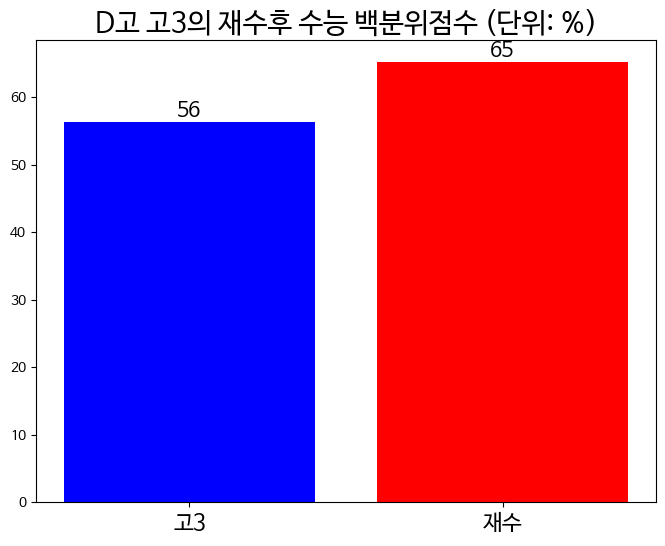

In [32]:
#고3 현역과 재수후 백분위 성적 비교 그래프

import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms


##  데이터 부르기
path = '/content/drive/MyDrive/python/deungchon/result_go3jesu/'
df = pd.read_excel(f'{path}go3_jesu2024_deungchon.xlsx')


# Convert columns to numeric, setting errors='coerce' to turn non-convertible values to NaN
df['백분위_평균'] = pd.to_numeric(df['백분위_평균'], errors='coerce')
df['백분위_평균_졸업'] = pd.to_numeric(df['백분위_평균_졸업'], errors='coerce')


# Calculate the mean and difference
mean_백분위_평균 = df['백분위_평균'].mean().round(1)
mean_백분위_평균_졸업 = df['백분위_평균_졸업'].mean().round(1)

#dif = (mean_백분위_평균_졸업 - mean_백분위_평균).round(1)
dif = (mean_백분위_평균_졸업 - mean_백분위_평균)
dif = int(round(dif))


# Print the results
print(f"mean_백분위_평균: {mean_백분위_평균}")
print(f"mean_백분위_평균_졸업: {mean_백분위_평균_졸업}")
print(f"D고 고3(2022)이 1년후 재수(2023)했을때 백분위 평균차이가 {dif}%입니다.")



# New labels for the x-axis
categories = ['고3', '재수']
values = [mean_백분위_평균, mean_백분위_평균_졸업]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, values, color=['blue', 'red'])


# Displaying values on the graph with increased font size
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(round(yval)), ha='center', va='bottom', fontsize = 15)  # Adjust fontsize as needed


#ax.set_xlabel('Categories')
#ax.set_ylabel('Values')
ax.set_title('D고 고3의 재수후 수능 백분위점수 (단위: %)', fontsize= 20)
ax.set_xticks(range(len(categories)), categories, rotation=0, fontsize=16)

plt.show()

In [ ]:
#중복제외한 2021년 고3 127명
df1 = df1['이름'].unique()
len(df1)

In [ ]:
#재수비율: 24%
30/127

In [ ]:
df_ij.shape

In [ ]:
#N수생 중 재수생수: 53%
30/57

In [ ]:
#합친 파일의 변수별 결측값 수
df_ij.isnull().sum()